In [ ]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns

# Modularized functions


### Population initialization function:


In [ ]:
def init_population(_mu:int, n:int):
    population = []
    for i in range (_mu):
        population.append(rd.sample(range(n), n))
    return population

In [ ]:
N = 5
pop = init_population(20, N)
print(pop)

[[2, 0, 4, 3, 1], [4, 1, 0, 2, 3], [0, 3, 1, 4, 2], [0, 4, 3, 1, 2], [4, 2, 1, 3, 0], [2, 0, 1, 3, 4], [4, 0, 2, 1, 3], [4, 0, 1, 3, 2], [0, 1, 2, 3, 4], [4, 2, 1, 3, 0], [4, 2, 1, 3, 0], [0, 1, 3, 4, 2], [3, 1, 0, 2, 4], [2, 3, 0, 1, 4], [3, 2, 1, 4, 0], [3, 2, 4, 0, 1], [0, 4, 3, 2, 1], [4, 2, 0, 1, 3], [2, 3, 0, 1, 4], [4, 2, 3, 0, 1]]


Example startup:


### Fitness function for a single solution:


In [ ]:
def fitness_nq(solution):
    xeques = 0
    for i in range(0,len(solution)):
        for j in range(0,len(solution)):
            if i!=j:
                if i-solution[i] == j-solution[j] or i+solution[i] == j+solution[j]:
                    xeques+=1
    xeques = int(xeques/2)
    return xeques

Example of a fitness function:


In [ ]:
fitness_nq([4, 1, 3, 5, 0, 2, 6, 7])

4

Fitness example for all population solutions


In [ ]:
pop_fitness = [fitness_nq(each_solution) for each_solution in pop]
print(pop_fitness)

[2, 2, 0, 2, 2, 2, 4, 2, 10, 2, 2, 2, 2, 4, 4, 4, 6, 2, 4, 4]



### Parent selection function:

In this function, a "pop" population is delivered, and 5 random parents are selected from it. The resulting vector is then sorted based on the "fitness" function of each parent, and the best two of these five are selected for crossbreeding and returned in a "best parents" vector.

In [ ]:
def select_parents(pop):
    pais_random = rd.sample(pop, 5)
    pais_random_fitness = [[fitness_nq(each_solution),index] for index, each_solution in enumerate(pais_random)]
    # pais_random_fitness é um vetor na forma [ [fitness1, index1], [fitness2, index2], ... ]
    pais_ordenados = sorted(pais_random_fitness)
    pai = pais_random[pais_ordenados[0][1]]
    mae = pais_random[pais_ordenados[1][1]]
    melhores_pais = pai, mae
    return melhores_pais

Test example:


In [ ]:
melhores_pais = select_parents(pop)
print(melhores_pais)

([3, 1, 0, 2, 4], [0, 1, 3, 4, 2])


### Function of recombining pairs of parents:


The "generar_filhos" function receives the vector containing the two best parents, result of the "select_parents" function, and returns two new solutions (children) following the pseudo-code steps of the "Cut-And-Crossfill CrossOver" algorithm:
1. Selects random crossover point in the genome, which contains N values
2. Separates both parents into two segments at this cut position
3. Copies the first half from parent 1 to child 1 and the first half from parent 2 to child 2
4. Cycle through parent 2 from left to right and fill in the remaining values ​​from child 1, skipping already used values
5. Cycle through parent 1 from left to right and fill in the remaining values ​​from child 2, skipping already used values

In [ ]:
def gerar_filhos(melhores_pais, N):
    pai = melhores_pais[0]
    mae = melhores_pais[1]
    # Corte do genótipo de ambos os pais:
    corte = rd.randint(0,N-1)
    pai1 = pai[:corte]
    pai2 = pai[corte:]
    mae1 = mae[:corte]
    mae2 = mae[corte:]
    # Combinação do genótipo:
    filho1 = pai1
    filho2 = mae1
    i = 0
    # Filho 1 tem primeira metade do genotipo do pai. A segunda metade é preenchida com o genotipo da mae, pulando valores já usados.
    while len(mae) > i:
      if all(genotipo != mae[i] for genotipo in filho1):
        filho1.append(mae[i])
      i = i + 1
    j = 0
    # Filho 2 tem primeira metade do genotipo da mae. A segunda metade é preenchida com o genotipo do pai, pulando valores já usados.
    while len(pai) > j:
      if all(genotipo != pai[j] for genotipo in filho2):
        filho2.append(pai[j])
      j = j + 1
    return filho1, filho2

In [ ]:
def verifica_filho(filho):
    for i in range(len(filho)):
        if filho[i] in filho[i+1:]:
            return False
    return True

In [ ]:
def gerar_filhos1(melhores_pais, N):
    pai = melhores_pais[0]
    mae = melhores_pais[1]
    copia_pai = pai
    copia_mae = mae
    filho1 = rd.sample(pai, int(N/2)) + rd.sample(mae, int(N/2))
    filho2 = rd.sample(mae, int(N/2)) + rd.sample(pai, int(N/2))
    while True:
      if verifica_filho(filho1):
        if verifica_filho(filho2):
          #print("Filho 1 é uma solução válida: ", filho1)
          #print("Filho 2 é uma solução válida: ", filho2)
          break
        else:
          #print("Filho 2 não é uma solução válida.", filho2)
          filho2 = rd.sample(mae, int(N/2)) + rd.sample(pai, int(N/2))
      else:
          #print("Filho 1 não é uma solução válida.", filho1)
          filho1 = rd.sample(pai, int(N/2)) + rd.sample(mae, int(N/2))

    return filho1 , filho2
# Verifica se os filhos são soluções válidas para o problema das N-rainhas

Test example:


In [ ]:
print("Pais selecionados:\nPai: {}\nMãe: {}".format(melhores_pais[0], melhores_pais[1]))
filho1, filho2 = gerar_filhos(melhores_pais, N)
print("Filhos gerados com os pais selecionados:\nFilho 1: {}\nFilho 2: {}".format(filho1, filho2))

Pais selecionados:
Pai: [3, 1, 0, 2, 4]
Mãe: [0, 1, 3, 4, 2]
Filhos gerados com os pais selecionados:
Filho 1: [3, 1, 0, 2, 4]
Filho 2: [0, 1, 3, 4, 2]


### Function to mutate the resulting children:
The mutation function takes a solution (child) and the number of queens (chromosomes). In this child, two random chromosomes are selected and, with an 80% probability of occurrence, these values ​​are exchanged, returning the child with or without the mutation.

In [ ]:
def mutacao(filho, N, mutation_rate):
  index_cromossomo1 = rd.randint(0, N)
  index_cromossomo2 = rd.randint(0, N)
  if rd.random() < mutation_rate:
    filho[index_cromossomo1], filho[index_cromossomo2] = filho[index_cromossomo2], filho[index_cromossomo1]
  return filho

Exemple:

In [ ]:
print("Filho 1 antes:  {}".format(filho1))
print("Filho 1 depois: {}".format(mutacao(filho1, N-1, 0.8)))

Filho 1 antes:  [3, 1, 0, 2, 4]
Filho 1 depois: [3, 1, 0, 4, 2]


### Function of evaluating new candidates and updating the population:
The function in question receives the population vectors, population fit function and the two children to be introduced. The pop and pop_fitness vectors are then updated with the new individuals and their individual "fitness", respectively.

In [ ]:
def atualiza_pop(pop, pop_fitness, filho1, filho2):
  pop_fitness.append(fitness_nq(filho1))
  pop_fitness.append(fitness_nq(filho2))
  pop.append(filho1)
  pop.append(filho2)
  return pop, pop_fitness

Example of use:


In [ ]:
print("População antes:  {}".format(pop))
print("Fitness da população antes:  {}".format(pop_fitness))
pop, pop_fitness = atualiza_pop(pop, pop_fitness, filho1, filho2)
print("População depois: {}".format(pop))
print("Fitness da população depois: {}".format(pop_fitness))

População antes:  [[2, 0, 4, 3, 1], [4, 1, 0, 2, 3], [0, 3, 1, 4, 2], [0, 4, 3, 1, 2], [4, 2, 1, 3, 0], [2, 0, 1, 3, 4], [4, 0, 2, 1, 3], [4, 0, 1, 3, 2], [0, 1, 2, 3, 4], [4, 2, 1, 3, 0], [4, 2, 1, 3, 0], [0, 1, 3, 4, 2], [3, 1, 0, 2, 4], [2, 3, 0, 1, 4], [3, 2, 1, 4, 0], [3, 2, 4, 0, 1], [0, 4, 3, 2, 1], [4, 2, 0, 1, 3], [2, 3, 0, 1, 4], [4, 2, 3, 0, 1]]
Fitness da população antes:  [2, 2, 0, 2, 2, 2, 4, 2, 10, 2, 2, 2, 2, 4, 4, 4, 6, 2, 4, 4]
População depois: [[2, 0, 4, 3, 1], [4, 1, 0, 2, 3], [0, 3, 1, 4, 2], [0, 4, 3, 1, 2], [4, 2, 1, 3, 0], [2, 0, 1, 3, 4], [4, 0, 2, 1, 3], [4, 0, 1, 3, 2], [0, 1, 2, 3, 4], [4, 2, 1, 3, 0], [4, 2, 1, 3, 0], [0, 1, 3, 4, 2], [3, 1, 0, 2, 4], [2, 3, 0, 1, 4], [3, 2, 1, 4, 0], [3, 2, 4, 0, 1], [0, 4, 3, 2, 1], [4, 2, 0, 1, 3], [2, 3, 0, 1, 4], [4, 2, 3, 0, 1], [3, 1, 0, 4, 2], [0, 1, 3, 4, 2]]
Fitness da população depois: [2, 2, 0, 2, 2, 2, 4, 2, 10, 2, 2, 2, 2, 4, 4, 4, 6, 2, 4, 4, 2, 2]


### Function of selecting individuals for the next generation:
Function receives the current population and eliminates the two least fit individuals (with lowest fitness). To do this, the fitness vector is sorted and the indexes of the two worst solutions are extracted from it.

In [ ]:
def select_survivors(pop):
    # Nova fitness da população e ordenação
    nova_popfitness = [[fitness_nq(each_solution), index] for index, each_solution in enumerate(pop)]
    nova_popfitness_ordenada = sorted(nova_popfitness)
    #print("\nAntes de eliminar (pop): {}".format(pop))
    #print("Antes de eliminar (fit): {}".format(nova_popfitness_ordenada))

    # Eliminação das duas piores soluções
    tamanho_pop = len(pop)
    index_piores = [nova_popfitness_ordenada[tamanho_pop-1][1], nova_popfitness_ordenada[tamanho_pop-2][1]]
    #print("Indexes piores: {}".format(index_piores))
    for index in sorted(index_piores, reverse=True):
      del pop[index]
    #print("Depois de eliminar(pop): {}\n".format(pop))
    return pop

Exemple:

In [ ]:
print("Antes de eliminar (pop):  {}".format(pop))
print("Antes de eliminar (fit):  {}".format(pop_fitness))
pop = select_survivors(pop)
pop_fitness = [fitness_nq(each_solution) for each_solution in pop]
print("Depois de eliminar (pop): {}".format(pop))
print("Depois de eliminar (fit): {}".format(pop_fitness))

Antes de eliminar (pop):  [[2, 0, 4, 3, 1], [4, 1, 0, 2, 3], [0, 3, 1, 4, 2], [0, 4, 3, 1, 2], [4, 2, 1, 3, 0], [2, 0, 1, 3, 4], [4, 0, 2, 1, 3], [4, 0, 1, 3, 2], [0, 1, 2, 3, 4], [4, 2, 1, 3, 0], [4, 2, 1, 3, 0], [0, 1, 3, 4, 2], [3, 1, 0, 2, 4], [2, 3, 0, 1, 4], [3, 2, 1, 4, 0], [3, 2, 4, 0, 1], [0, 4, 3, 2, 1], [4, 2, 0, 1, 3], [2, 3, 0, 1, 4], [4, 2, 3, 0, 1], [3, 1, 0, 4, 2], [0, 1, 3, 4, 2]]
Antes de eliminar (fit):  [2, 2, 0, 2, 2, 2, 4, 2, 10, 2, 2, 2, 2, 4, 4, 4, 6, 2, 4, 4, 2, 2]
Depois de eliminar (pop): [[2, 0, 4, 3, 1], [4, 1, 0, 2, 3], [0, 3, 1, 4, 2], [0, 4, 3, 1, 2], [4, 2, 1, 3, 0], [2, 0, 1, 3, 4], [4, 0, 2, 1, 3], [4, 0, 1, 3, 2], [4, 2, 1, 3, 0], [4, 2, 1, 3, 0], [0, 1, 3, 4, 2], [3, 1, 0, 2, 4], [2, 3, 0, 1, 4], [3, 2, 1, 4, 0], [3, 2, 4, 0, 1], [4, 2, 0, 1, 3], [2, 3, 0, 1, 4], [4, 2, 3, 0, 1], [3, 1, 0, 4, 2], [0, 1, 3, 4, 2]]
Depois de eliminar (fit): [2, 2, 0, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 4, 2, 2]


In [ ]:
def select_survivors1(pop):
    nova_pop = [[fitness_nq(each_solution),index] for index, each_solution in enumerate(pop)]
    nova_pop_ordenada = sorted(nova_pop)
    #print("Antes de eliminar: {}".format(nova_pop_ordenada))
    for i, teste in enumerate(nova_pop_ordenada):
      pop[i] = pop[teste[1]]

    del pop[-2:]
    pop_teste = [[fitness_nq(each_solution),index] for index, each_solution in enumerate(pop)]
    #print("Depois de eliminar: {}".format(pop_teste))
    return pop

In [ ]:
crossover_rate = 1
mutation_rate = 0.8
N = 10

iteracoes = 0
flag = 0
melhor_fit = []
fit_medio = []

# Inicialização de população aleatória (20 populações de N posições):
pop = init_population(20, N)
pop_fitness = [fitness_nq(each_solution) for each_solution in pop]
# Seleção dos dois melhores pais a partir de 5 aleatórios:
melhores_pais = select_parents(pop)

  # Geração dos filhos:
filho1, filho2 = gerar_filhos(melhores_pais, N)

  # Mutação dos filhos:
filho1 = mutacao(filho1, N-1, mutation_rate)
filho2 = mutacao(filho2, N-1, mutation_rate)

  # Atualização da população e do fitness:
pop, pop_fitness = atualiza_pop(pop, pop_fitness, filho1, filho2)

  # Seleção dos mais aptos (elimina os dois dois menos aptos) e atualiza fitness
pop1 = pop
pop = select_survivors(pop)
pop = select_survivors1(pop1)
pop_fitness = [fitness_nq(each_solution) for each_solution in pop]
pop_fitness1 = [fitness_nq(each_solution) for each_solution in pop1]
print(pop_fitness)
print(pop_fitness1)
if pop_fitness == pop_fitness1:
  print("são iguais")

[3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 3, 4, 4, 4, 3, 3, 4]
[3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 3, 4, 4, 4, 3, 3, 4]
são iguais



### Function of drawing the board:
This function is purely aesthetic, for the purpose of visualizing the best solution found and was developed with the help of the "ChatGPT" tool. To test visual changes, simply uncomment the last two lines and plot the example

In [ ]:
def draw_board(solucao):
    n = len(solucao)
    chessboard = np.zeros((n,n))

    for i in range(n):
        for j in range(n):
            if (i+j) % 2 == 0:
                chessboard[i,j] = 0.9

    plt.imshow(chessboard, cmap='gray', vmin=0, vmax=1)

    for i in range(n):
        plt.text(i, n-solucao[i], '♛', ha='center', va='center', fontsize=30, color='darkorange')

    plt.xlim([-0.5, n-0.5])
    plt.ylim([-0.5, n-0.5])
    plt.axis('off')
    plt.show()

#solucao = [2,4,3,1]
#draw_board(solucao)

# Generations loop:
In this section, the previously declared functions are used to apply the Genetic Algorithms pseudo-code, shown below, in which the stopping conditions are: Finding a solution with zero checks or reaching 2000 iterations.

**Start of Pseudo-code**

> *Initialize population* with random solutions;
>
> *Evaluate* each candidate;
>
> While (*Stop conditions* not satisfied), do:
>
> > *Select* Country;
> >
> > *Recombine* Parents;
> >
> > *Mutation* of the result;
> >
> > *Evaluate* new candidates;
> >
> > *Select* individuals for the next generation;

**End of Pseudo-code**


População da iteração 280: 
Pop: [[4, 9, 7, 5, 1, 3, 0, 6, 8, 2], [9, 4, 1, 8, 2, 5, 7, 3, 0, 6], [9, 4, 1, 8, 2, 5, 7, 0, 3, 6], [4, 9, 7, 5, 1, 3, 0, 6, 8, 2], [4, 9, 7, 5, 1, 3, 0, 6, 8, 2], [4, 9, 7, 5, 1, 3, 0, 6, 8, 2], [4, 9, 7, 5, 1, 3, 0, 6, 8, 2], [9, 4, 1, 8, 2, 5, 7, 3, 0, 6], [4, 9, 7, 5, 1, 3, 0, 6, 8, 2], [4, 9, 7, 5, 1, 3, 0, 6, 8, 2], [9, 4, 1, 8, 2, 5, 7, 3, 0, 6], [4, 9, 7, 5, 1, 3, 0, 6, 8, 2], [9, 4, 1, 8, 2, 5, 7, 3, 0, 6], [4, 9, 7, 5, 1, 3, 0, 6, 8, 2], [4, 9, 7, 5, 1, 3, 0, 6, 8, 2], [4, 9, 7, 5, 1, 3, 0, 6, 8, 2], [9, 4, 1, 8, 2, 5, 7, 3, 0, 6], [9, 4, 1, 8, 2, 5, 7, 3, 0, 6], [4, 9, 7, 5, 1, 3, 0, 6, 8, 2], [8, 4, 1, 9, 2, 5, 7, 0, 3, 6]]
Fit: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
Melhor solução: [8, 4, 1, 9, 2, 5, 7, 0, 3, 6], com 0 xeques


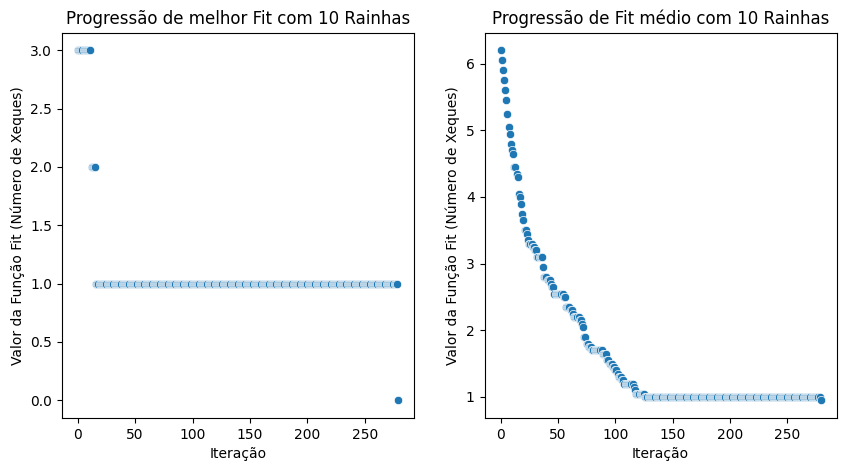

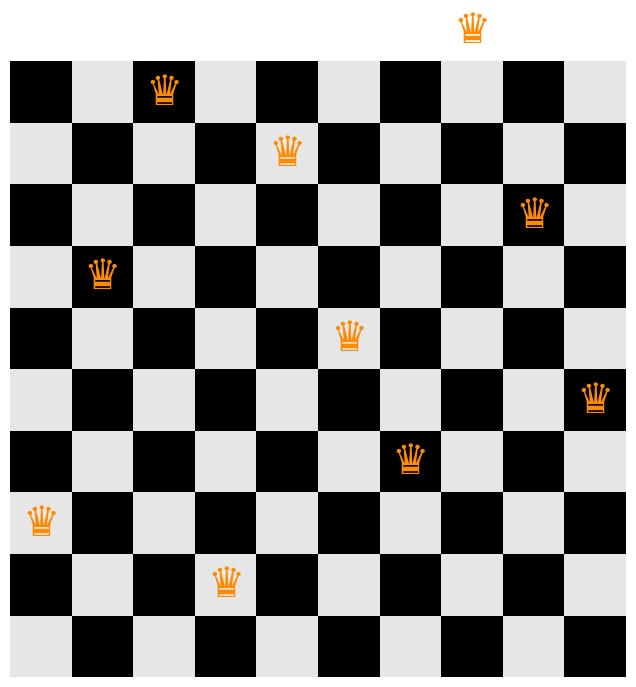

In [ ]:
# crossover_rate = 1
mutation_rate = 0.8
N = 10

iteracoes = 0
flag = 0
melhor_fit = []
fit_medio = []

# Inicialização de população aleatória (20 populações de N posições):
pop = init_population(20, N)
pop_fitness = [fitness_nq(each_solution) for each_solution in pop]

while True:
  # Seleção dos dois melhores pais a partir de 5 aleatórios:
  melhores_pais = select_parents(pop)

  # Geração dos filhos:
  filho1, filho2 = gerar_filhos(melhores_pais, N)

  # Mutação dos filhos:
  filho1 = mutacao(filho1, N-1, mutation_rate)
  filho2 = mutacao(filho2, N-1, mutation_rate)

  # Atualização da população e do fitness:
  pop, pop_fitness = atualiza_pop(pop, pop_fitness, filho1, filho2)

  # Seleção dos mais aptos (elimina os dois dois menos aptos) e atualiza fitness
  pop = select_survivors(pop)
  pop_fitness = [fitness_nq(each_solution) for each_solution in pop]

  # Histórico para gráfico de fitness da melhor solução e fitness médio:
  melhor_fit.append(sorted(pop_fitness)[0])
  fit_medio.append(np.mean(pop_fitness))

  #print("\nPopulação da iteração {}: \nPop: {}\nFit: {}".format(iteracoes, pop, pop_fitness))
  iteracoes = iteracoes + 1

  # Verificação das condições de parada (zero cheques ou máximo de iterações)
  #if all(elemento == 0 for elemento in pop_fitness):
  for fit in pop_fitness:
    if fit == 0:
      flag = 1
      break
  if flag == 1 or iteracoes == 2000:
    print("\nPopulação da iteração {}: \nPop: {}\nFit: {}".format(iteracoes, pop, pop_fitness))

    fig, axes = plt.subplots(1,2)
    fig.set_figheight(5)
    fig.set_figwidth(10)

    fig1 = sns.scatterplot(data = melhor_fit, ax = axes[0])
    fig1.set(title = "Progressão de melhor Fit com {} Rainhas".format(N))
    fig1.set_xlabel('Iteração')
    fig1.set_ylabel('Valor da Função Fit (Número de Xeques)')

    fig2 = sns.scatterplot(data = fit_medio, ax = axes[1])
    fig2.set(title = "Progressão de Fit médio com {} Rainhas".format(N))
    fig2.set_xlabel('Iteração')
    fig2.set_ylabel('Valor da Função Fit (Número de Xeques)')

    melhor_solucao = pop[pop_fitness.index(sorted(pop_fitness)[0])]
    print("Melhor solução: {}, com {} xeques".format(melhor_solucao, fitness_nq(melhor_solucao)))
    fig, axes = plt.subplots()
    fig.set_figheight(8)
    fig.set_figwidth(8)
    draw_board(melhor_solucao)

    break

In [ ]:
print(fit_medio)
print(melhor_fit)

[6.2, 6.05, 5.9, 5.75, 5.6, 5.45, 5.25, 5.05, 4.95, 4.8, 4.7, 4.65, 4.45, 4.45, 4.35, 4.3, 4.05, 4.0, 3.9, 3.75, 3.65, 3.5, 3.5, 3.45, 3.35, 3.3, 3.3, 3.3, 3.25, 3.25, 3.2, 3.2, 3.1, 3.1, 3.1, 3.1, 3.1, 2.95, 2.8, 2.8, 2.8, 2.75, 2.75, 2.75, 2.7, 2.65, 2.65, 2.55, 2.55, 2.55, 2.55, 2.55, 2.55, 2.55, 2.55, 2.5, 2.5, 2.35, 2.35, 2.35, 2.35, 2.3, 2.3, 2.25, 2.2, 2.2, 2.2, 2.2, 2.2, 2.15, 2.15, 2.1, 2.05, 1.9, 1.9, 1.8, 1.8, 1.75, 1.75, 1.75, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.65, 1.65, 1.65, 1.65, 1.55, 1.55, 1.5, 1.5, 1.5, 1.45, 1.45, 1.4, 1.4, 1.35, 1.3, 1.3, 1.3, 1.25, 1.25, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.15, 1.1, 1.05, 1.05, 1.05, 1.05, 1.05, 1.05, 1.05, 1.05, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.